In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation
%matplotlib inline

## 1.2.2 Schrodinger's Equation

In [283]:
def direct_method(d, alpha):
    '''
    Direct solution to the time independent Schrodinger equation
    AU = b --> U = A^(-1)b
    '''

    # This is really not the most efficient way to calculate dx,
    #  but I didn't feel like doing math. 
    x = np.linspace(0,1,d)
    h = x[1]-x[0]
        
    # the actual grid is (d)x(d) but since we know the boundary there are (d-2)x(d-2) unknown u values
    d=d-2
    
    # We will be solving a system of (d-2)x(d-2) equations 
    # so the solution vector contains (d-2)x(d-2) u values 
    # and the coefficient matrix A is (d-2)**2 x (d-2)**2
    dim = d*d
    A = np.zeros((dim,dim))
    b = np.zeros(dim)

    #Begin count
    row = 0

    #Now for every row j in our matrix
    for j in range(d):
        #Iterate through all the elements in the row (the columns i if you prefer)
        for i in range(d):
       
            #Go through and generate our column vector b, assuming our grid is 1 at all boundaries
        
            #Do the left side of the grid
            if i ==0:
                b[row] +=1
            #Do the top of the grid
            if j==0:
                b[row] +=1
             #Do the right side of the grid
            if i==d-1:
                b[row] +=1
            #Do the bottom of the grid
            if j ==d-1:
                b[row] +=1
            
            #Time to generate the matrix of coefficients
            #Set the diagonal elements of A
            A[row][row] = (4+h*h*alpha)
        
            #If we aren't at the left most side of the active zone, the coefficient of u_(j,i-1) is -1
            if row-1 >=0:
                if i!=0: A[row][row-1] = -1
            
            #If we aren't at the right most side of the active zone, the coefficient of u_(j,i+1) is -1
            if row+1<d*d:
                if i!=d-1: A[row][row+1] =-1
            
            #If we aren't at the top of the active zone, the coefficient of u_(j-1,i) is -1
            if row-d >=0:
                if j!=0:A[row][row-d] = -1
            
            #If we aren't at the bottom of the active zone, the coefficient of u_(j+1,i) is -1
            if row+d <d*d:
                if j!=d-1: A[row][row+d] =-1
        
            #Update the counter which tells us which row of A we are currently in
            row = row+1
                
    # find the inverse of matrix A
    An1 = np.linalg.inv(A)
        
    # U = A^(-1)b
    U = np.dot(An1,b)
        
    # reshape the solution into a dxd grid
    u = np.reshape(U, (d,d))
    
    # add the boundary back onto the grid
    grid = np.ones((d+2,d+2))
    grid[1:d+1,1:d+1] = u
        
    return grid
        

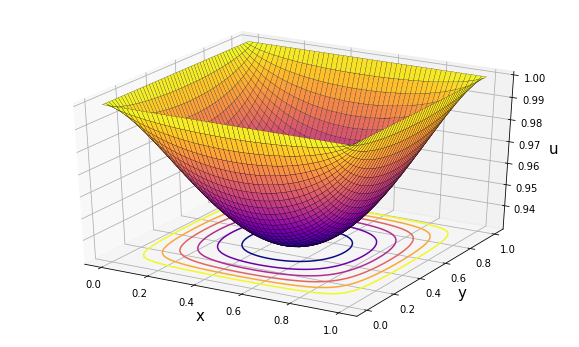

In [915]:
%matplotlib inline
u = direct_method(50, 1)

x = np.linspace(0,1,50)
y = np.linspace(0,1,50)
xx, yy = np.meshgrid(x,y)

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1, 1, 1, projection='3d')

surf = ax.plot_surface(xx, yy, u, cmap='plasma', edgecolors='black', linewidth=0.2)
ax.contour(xx, yy, u, zdir = 'z', cmap='plasma', offset=0.93)
ax.set_ylabel('y', fontsize=15)
ax.set_xlabel('x', fontsize=15)
ax.set_zlabel('u', fontsize=15)

In [264]:
def set_boundary(grid):
    
    grid[-1,:]=1
    grid[0,:]=1
    grid[:,0]=1
    grid[:,-1]=1
    
    return
    

In [265]:
def uij(i, j, dx, dy, alpha, grid):
    
    dy2 = dy**2
    dx2 = dx**2
    
    numerator = dy2*grid[j][i+1] + dy2*grid[j][i-1] + dx2*u[j+1][i] +dx2*u[j-1][i]
    denominator = 2*dy2 + 2*dx2 + dx2*dy2*alpha
    
    return numerator/denominator

In [910]:
def jacobi_method(dx, dy, alpha, grid, w, nsteps=50000):
    
    Y,X = grid.shape
    
    for n in range(nsteps):
        previous_grid = grid.copy()
        for i in range(1,X-1):
            for j in range(1,Y-1):
                
                grid[j][i] = w*uij(i, j, dx, dy, alpha, previous_grid) + (1-w)*previous_grid[j][i]
        

        if np.abs(grid-previous_grid).max()<1e-8:
            print('w =', w, 'loop stopped after',n,'iterations')
            break;
            
        set_boundary(grid)

    return 

w = 0.1 loop stopped after 47142 iterations


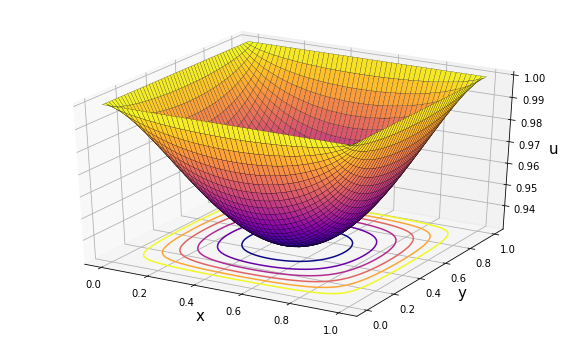

w = 0.25 loop stopped after 19790 iterations


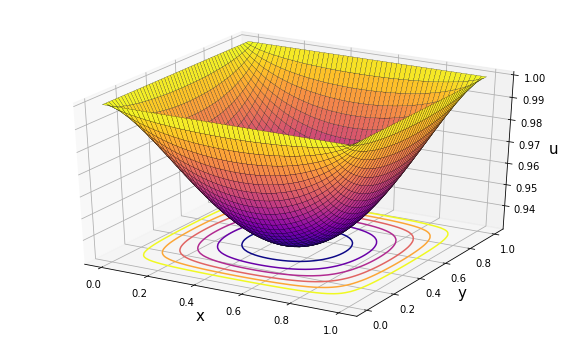

w = 0.5 loop stopped after 9852 iterations


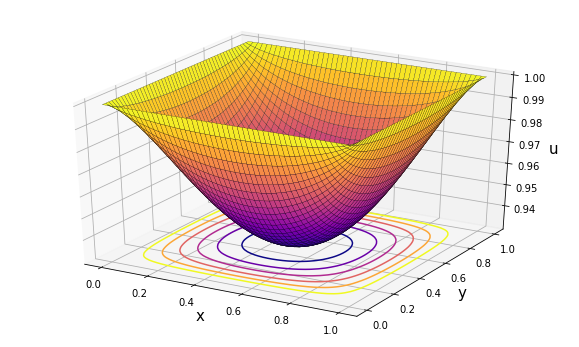

w = 0.75 loop stopped after 6338 iterations


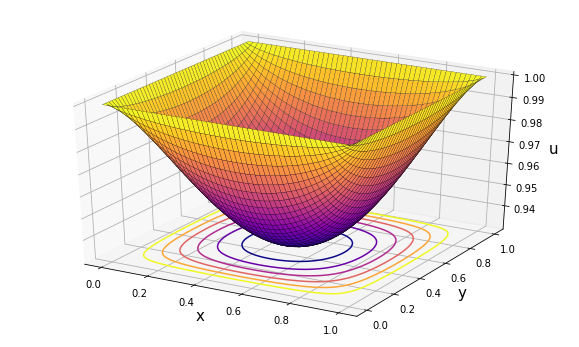

w = 0.9 loop stopped after 5128 iterations


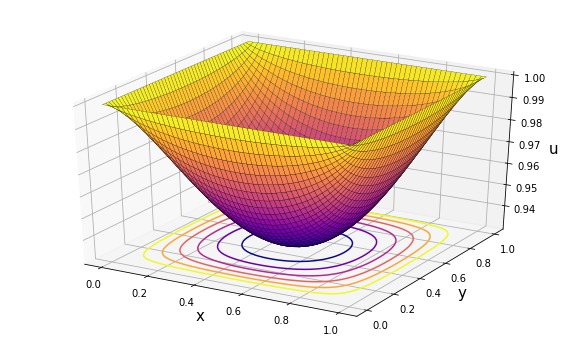

In [916]:
weights=(0.1,0.25,0.5,0.75,0.9)

for w in weights:

    x = np.linspace(0,1,50)
    y = np.linspace(0,1,50)

    u = np.zeros((50,50))
    set_boundary(u)

    jacobi_method(x[1]-x[0], y[1]-y[0], 1, u, w)

    xx, yy = np.meshgrid(x,y)

    fig = plt.figure(figsize=(10,6))
    ax = fig.add_subplot(1, 1, 1, projection='3d')

    surf = ax.plot_surface(xx, yy, u, cmap='plasma', edgecolors='black', linewidth=0.2)
    ax.contour(xx, yy, u, zdir = 'z', cmap='plasma', offset=0.93)
    ax.set_ylabel('y', fontsize=15)
    ax.set_xlabel('x', fontsize=15)
    ax.set_zlabel('u', fontsize=15)
    plt.show()

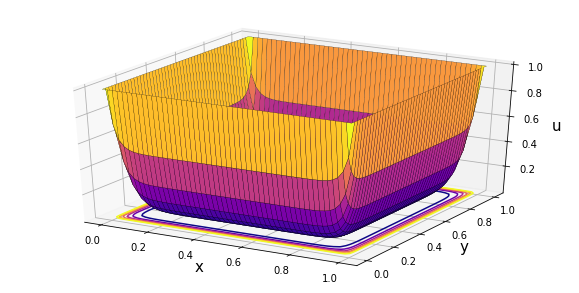

In [907]:
u = direct_method(50, 1000)

x = np.linspace(0,1,50)
y = np.linspace(0,1,50)
xx, yy = np.meshgrid(x,y)

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 1, 1, projection='3d')

surf = ax.plot_surface(xx, yy, u, cmap='plasma', edgecolors='black', linewidth=0.2)
ax.contour(xx, yy, u, zdir = 'z', cmap='plasma', offset=0)
ax.set_ylabel('y', fontsize=15)
ax.set_xlabel('x', fontsize=15)
ax.set_zlabel('u', fontsize=15)

w = 0.1 loop stopped after 1076 iterations


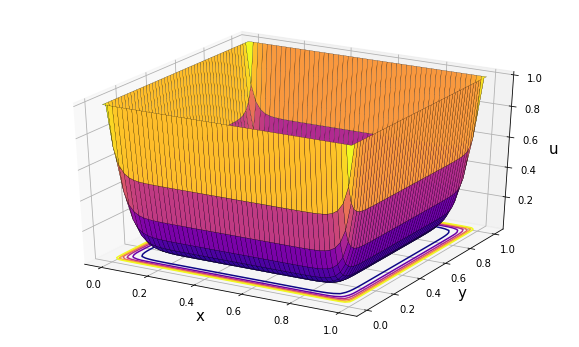

w = 0.25 loop stopped after 448 iterations


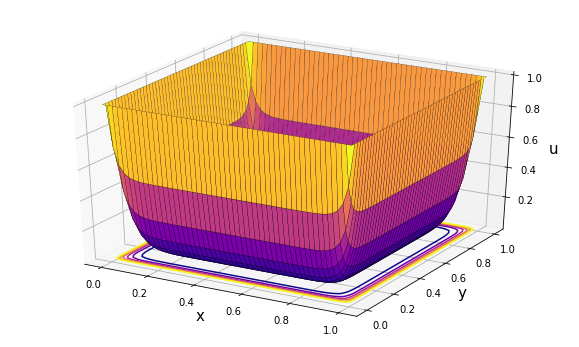

w = 0.5 loop stopped after 221 iterations


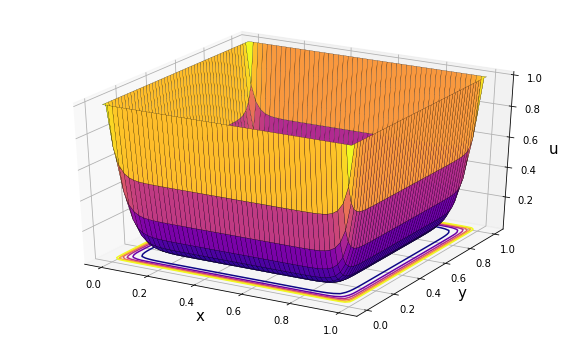

w = 0.75 loop stopped after 141 iterations


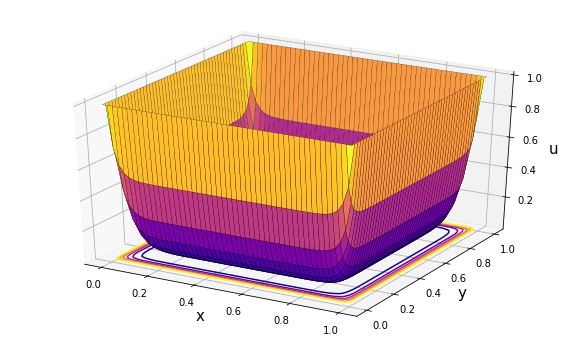

w = 0.9 loop stopped after 114 iterations


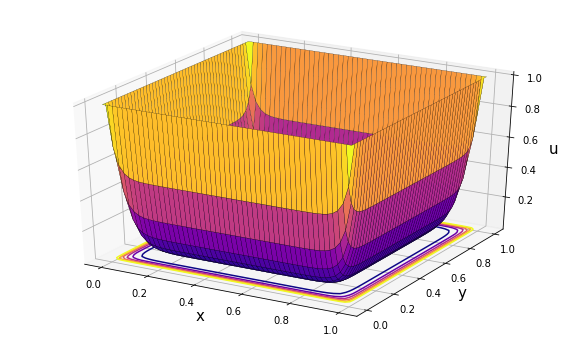

In [917]:
weights=(0.1,0.25,0.5,0.75,0.9)

for w in weights:

    x = np.linspace(0,1,50)
    y = np.linspace(0,1,50)

    u = np.zeros((50,50))
    set_boundary(u)

    jacobi_method(x[1]-x[0], y[1]-y[0], 1000, u, w)

    xx, yy = np.meshgrid(x,y)

    fig = plt.figure(figsize=(10,6))
    ax = fig.add_subplot(1, 1, 1, projection='3d')

    surf = ax.plot_surface(xx, yy, u, cmap='plasma', edgecolors='black', linewidth=0.2)
    ax.contour(xx, yy, u, zdir = 'z', cmap='plasma', offset=0)
    ax.set_ylabel('y', fontsize=15)
    ax.set_xlabel('x', fontsize=15)
    ax.set_zlabel('u', fontsize=15)
    plt.show()

## The advection equation

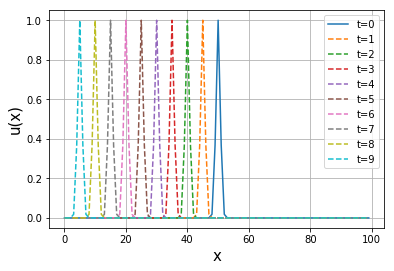

In [2]:
# If you set a pulse as the initial function u0, what happens to it when c>0, c<0
u0 = lambda x: np.exp(-(x-50)**2)

def advec_exact(u0, x, c, t):
    
    x = x+c*t
    
    return u0(x)

x = np.linspace(0,99,100)

y = advec_exact(u0, x, 5, 0)
plt.plot(x,y, label='t=0')

for t in range(1,10):
    
    y = advec_exact(u0, x, 5, t)
    plt.plot(x,y, '--', label='t={}'.format(t))

plt.grid('on')
plt.xlabel('x', fontsize=15)
plt.ylabel('u(x)', fontsize=15)
plt.legend(loc='best')

In [13]:
def plot_points_in_time(x, wavegrid, ax, labels=None):
    
    tsteps = wavegrid.shape[0]
    
    t1 = tsteps//5
    t2 = 2*tsteps//5
    t3 = 3*tsteps//5
    t4 = 4*tsteps//5

    
    for t in range(1,tsteps):
        
        if t==t1:
                ax.plot(x, wavegrid[t], 'r--')
        if t==t2:
                ax.plot(x, wavegrid[t], 'g--')
                
        if t==t3:
                ax.plot(x, wavegrid[t], 'm--')
                
        if t==t4:
                ax.plot(x, wavegrid[t], 'c--')
       
        ax.plot(x, wavegrid[0], 'b-')
        
        if labels is not None:
            
            ax.set_title(labels[0], fontsize=17)
            ax.set_xlabel(labels[1], fontsize=20)
            ax.set_ylabel(labels[2], fontsize=20)
            
            ax.grid('on')
            
            ax.tick_params(labelsize=15)
    return
            

In [4]:
u0sin = lambda x: np.sin(2*x)

def u0step(x):
    
    y = np.ones(x.size)
    y[np.where(x<0)]=0
    
    return y
    
def u0delta(x):
    
    dx = x[1]-x[0]
    
    y = np.zeros(x.size)
    y[int(y.size/2)]=1/dx
    
    return y
    
u0gauss = lambda x: np.exp(-4*x*x)
    

def set_initial_wavegrid(dx, dt, u0):
    
    xsteps = int(4/dx)+1
    tsteps = int(2/dt)
    #print('dx =', dx, 'with', xsteps, 'x-steps. dt=', dt, 'with', tsteps, 't-steps.')
   
    x = np.array([-2 + dx*x for x in range(0,xsteps)])

    wavegrid = np.zeros((tsteps,xsteps))
    #print(wavegrid.shape, '\n')
    
    wavegrid[0] = u0(x)
    
    return x, wavegrid

In [15]:
def plot_trials(func):
    
    space_steps = (0.04, 0.02, 0.0137, 0.0101, 0.0099, 0.02, 0.02)
    time_steps = (0.02, 0.02,0.02,0.02,0.02,0.01,0.04)
    
    fig, ax = plt.subplots(7,4, figsize=(25,30))

    row = 0
    for n, dx in enumerate(space_steps):
        dt = time_steps[n]
        r = 0.5*dt/dx
    
        x, wavegrid = set_initial_wavegrid(dx, dt, func)
        forward_euler(wavegrid, dx, dt, 0.5)
        title = 'Forward Euler (dt={}, dx={}, r={})'.format(dt, dx, np.round(r,2))
        plot_points_in_time(x, wavegrid, ax[row][0], labels=(title,'x', 'u'))
    
        x, wavegrid = set_initial_wavegrid(dx, dt, func)
        lax_wendroff(wavegrid, dx, dt, 0.5)
        title = 'Lax-Wendroff (dt={}, dx={}, r={})'.format(dt, dx, np.round(r,2))
        plot_points_in_time(x, wavegrid, ax[row][1], labels=(title,'x', 'u'))
    
        x, wavegrid = set_initial_wavegrid(dx, dt, func)
        backward_euler(wavegrid, dx, dt, 0.5)
        title = 'Backward Euler (dt={}, dx={}, r={})'.format(dt, dx, np.round(r,2))
        plot_points_in_time(x, wavegrid, ax[row][2], labels=(title,'x', 'u'))
    
        x, wavegrid = set_initial_wavegrid(dx, dt, func)
        crank_nicholson(wavegrid, dx, dt, 0.5)
        title = 'Crank Nicholson (dt={}, dx={}, r={})'.format(dt, dx, np.round(r,2))
        plot_points_in_time(x, wavegrid, ax[row][3], labels=(title,'x', 'u'))
    
        row +=1
    
    plt.tight_layout()
    plt.tick_params(labelsize=15)
    
    return

In [6]:
def forward_euler(wavegrid, dx, dt, c):
    
    tmax = wavegrid.shape[0]
    xmax = wavegrid.shape[1]
    
    C = c*dt/(2*dx)
    
    for t in range(1,tmax):
        
        wavegrid[t][0] = wavegrid[0][0]
        wavegrid[t][xmax-1] = wavegrid[0][xmax-1]
        
        for i in range(1, xmax-1):
            
            wavegrid[t][i] = wavegrid[t-1][i] + C*(wavegrid[t-1][i+1]-wavegrid[t-1][i-1])
  
    return


In [7]:
def lax_wendroff(wavegrid, dx, dt, c):
    
    tmax = wavegrid.shape[0]
    xmax = wavegrid.shape[1]
    
    C = c*dt/(2*dx)
    C2 = ((c*dt/dx)**2)/2
    
    for t in range(1,tmax):
        
        for i in range(1, xmax-1):
            past = t-1
            wavegrid[t][i] = wavegrid[past][i] + C*(wavegrid[past][i+1] - wavegrid[past][i-1]) + \
                + C2*(wavegrid[past][i+1] - 2*wavegrid[past][i] + wavegrid[past][i-1])
  
        wavegrid[t][0] = wavegrid[0][0]
        wavegrid[t][xmax-1] = wavegrid[0][xmax-1]
        
    return


In [8]:
def backward_euler(wavegrid, dx, dt, c):
    
    tmax = wavegrid.shape[0]
    xmax = wavegrid.shape[1]
    
    C = c*dt/(2*dx)
    
    for t in range(1,tmax):
        
        theFuture = np.zeros((xmax, xmax))
        
        for i in range(xmax):
            
            if np.logical_and(i!= xmax-1, i!=0): theFuture[i][i-1]=C
            theFuture[i][i] = 1
            if np.logical_and(i!= xmax-1, i!=0): theFuture[i][i+1]=-C
        
        theFutureInverse = np.linalg.inv(theFuture)
        
        wavegrid[t] = np.dot(theFutureInverse, wavegrid[t-1])
        #wavegrid[t][0] = wavegrid[0][0]
        #wavegrid[t][xmax-1] = wavegrid[0][xmax-1]
  
    return


In [9]:
def crank_nicholson(wavegrid, dx, dt, c):
    
    tmax = wavegrid.shape[0]
    xmax = wavegrid.shape[1]
    
    C = c*dt/(4*dx)
    
    for t in range(1,tmax):
                
        theFuture = np.zeros((xmax, xmax))
        thePast = np.zeros((xmax, xmax))
        
        for i in range(xmax):
            
            if np.logical_and(i!= xmax-1, i!=0): theFuture[i][i-1]=C
            theFuture[i][i] = 1
            if np.logical_and(i!= xmax-1, i!=0): theFuture[i][i+1]=-C
        
            if np.logical_and(i!= xmax-1, i!=0): thePast[i][i-1]=-C
            thePast[i][i] = 1
            if np.logical_and(i!= xmax-1, i!=0): thePast[i][i+1]=C
        
        
        theFutureInverse = np.linalg.inv(theFuture)
        thePastandFuture = np.dot(theFutureInverse, thePast)
        wavegrid[t] = np.dot(thePastandFuture, wavegrid[t-1])
        
        #wavegrid[t][0] = wavegrid[0][0]
        #wavegrid[t][xmax-1] = wavegrid[0][xmax-1]
  
    return


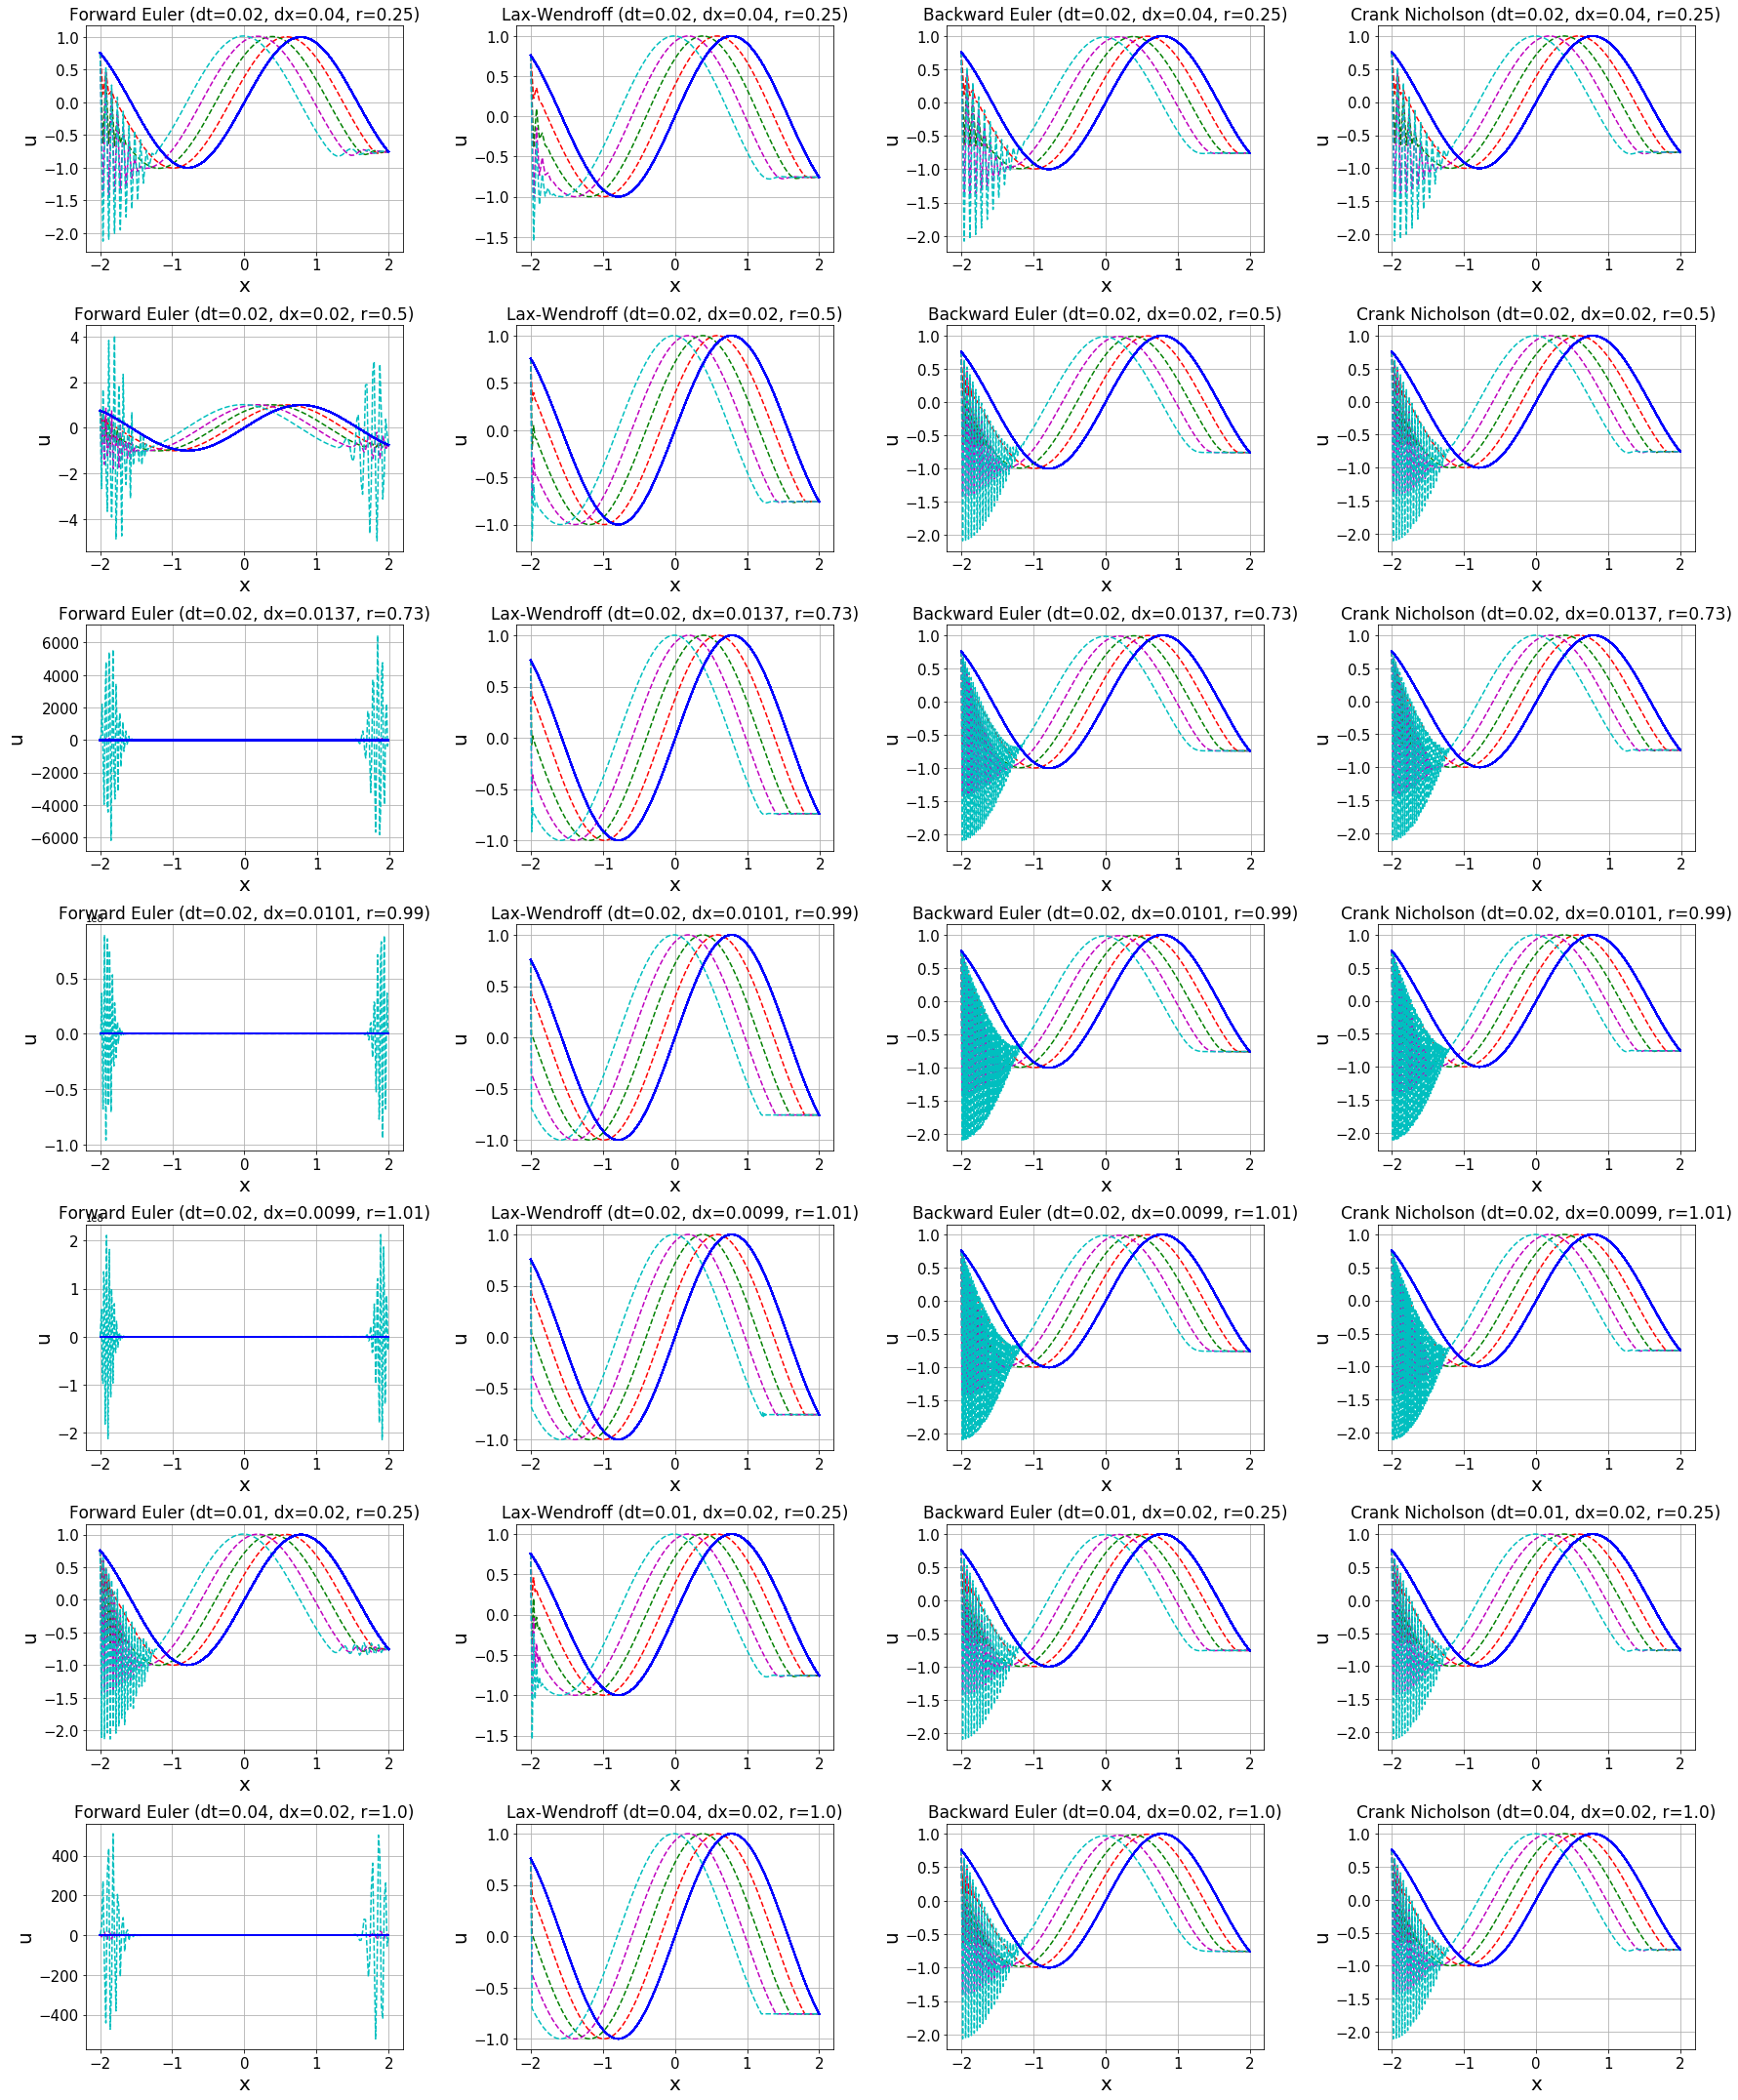

In [16]:
func = u0sin
plot_trials(func)
    

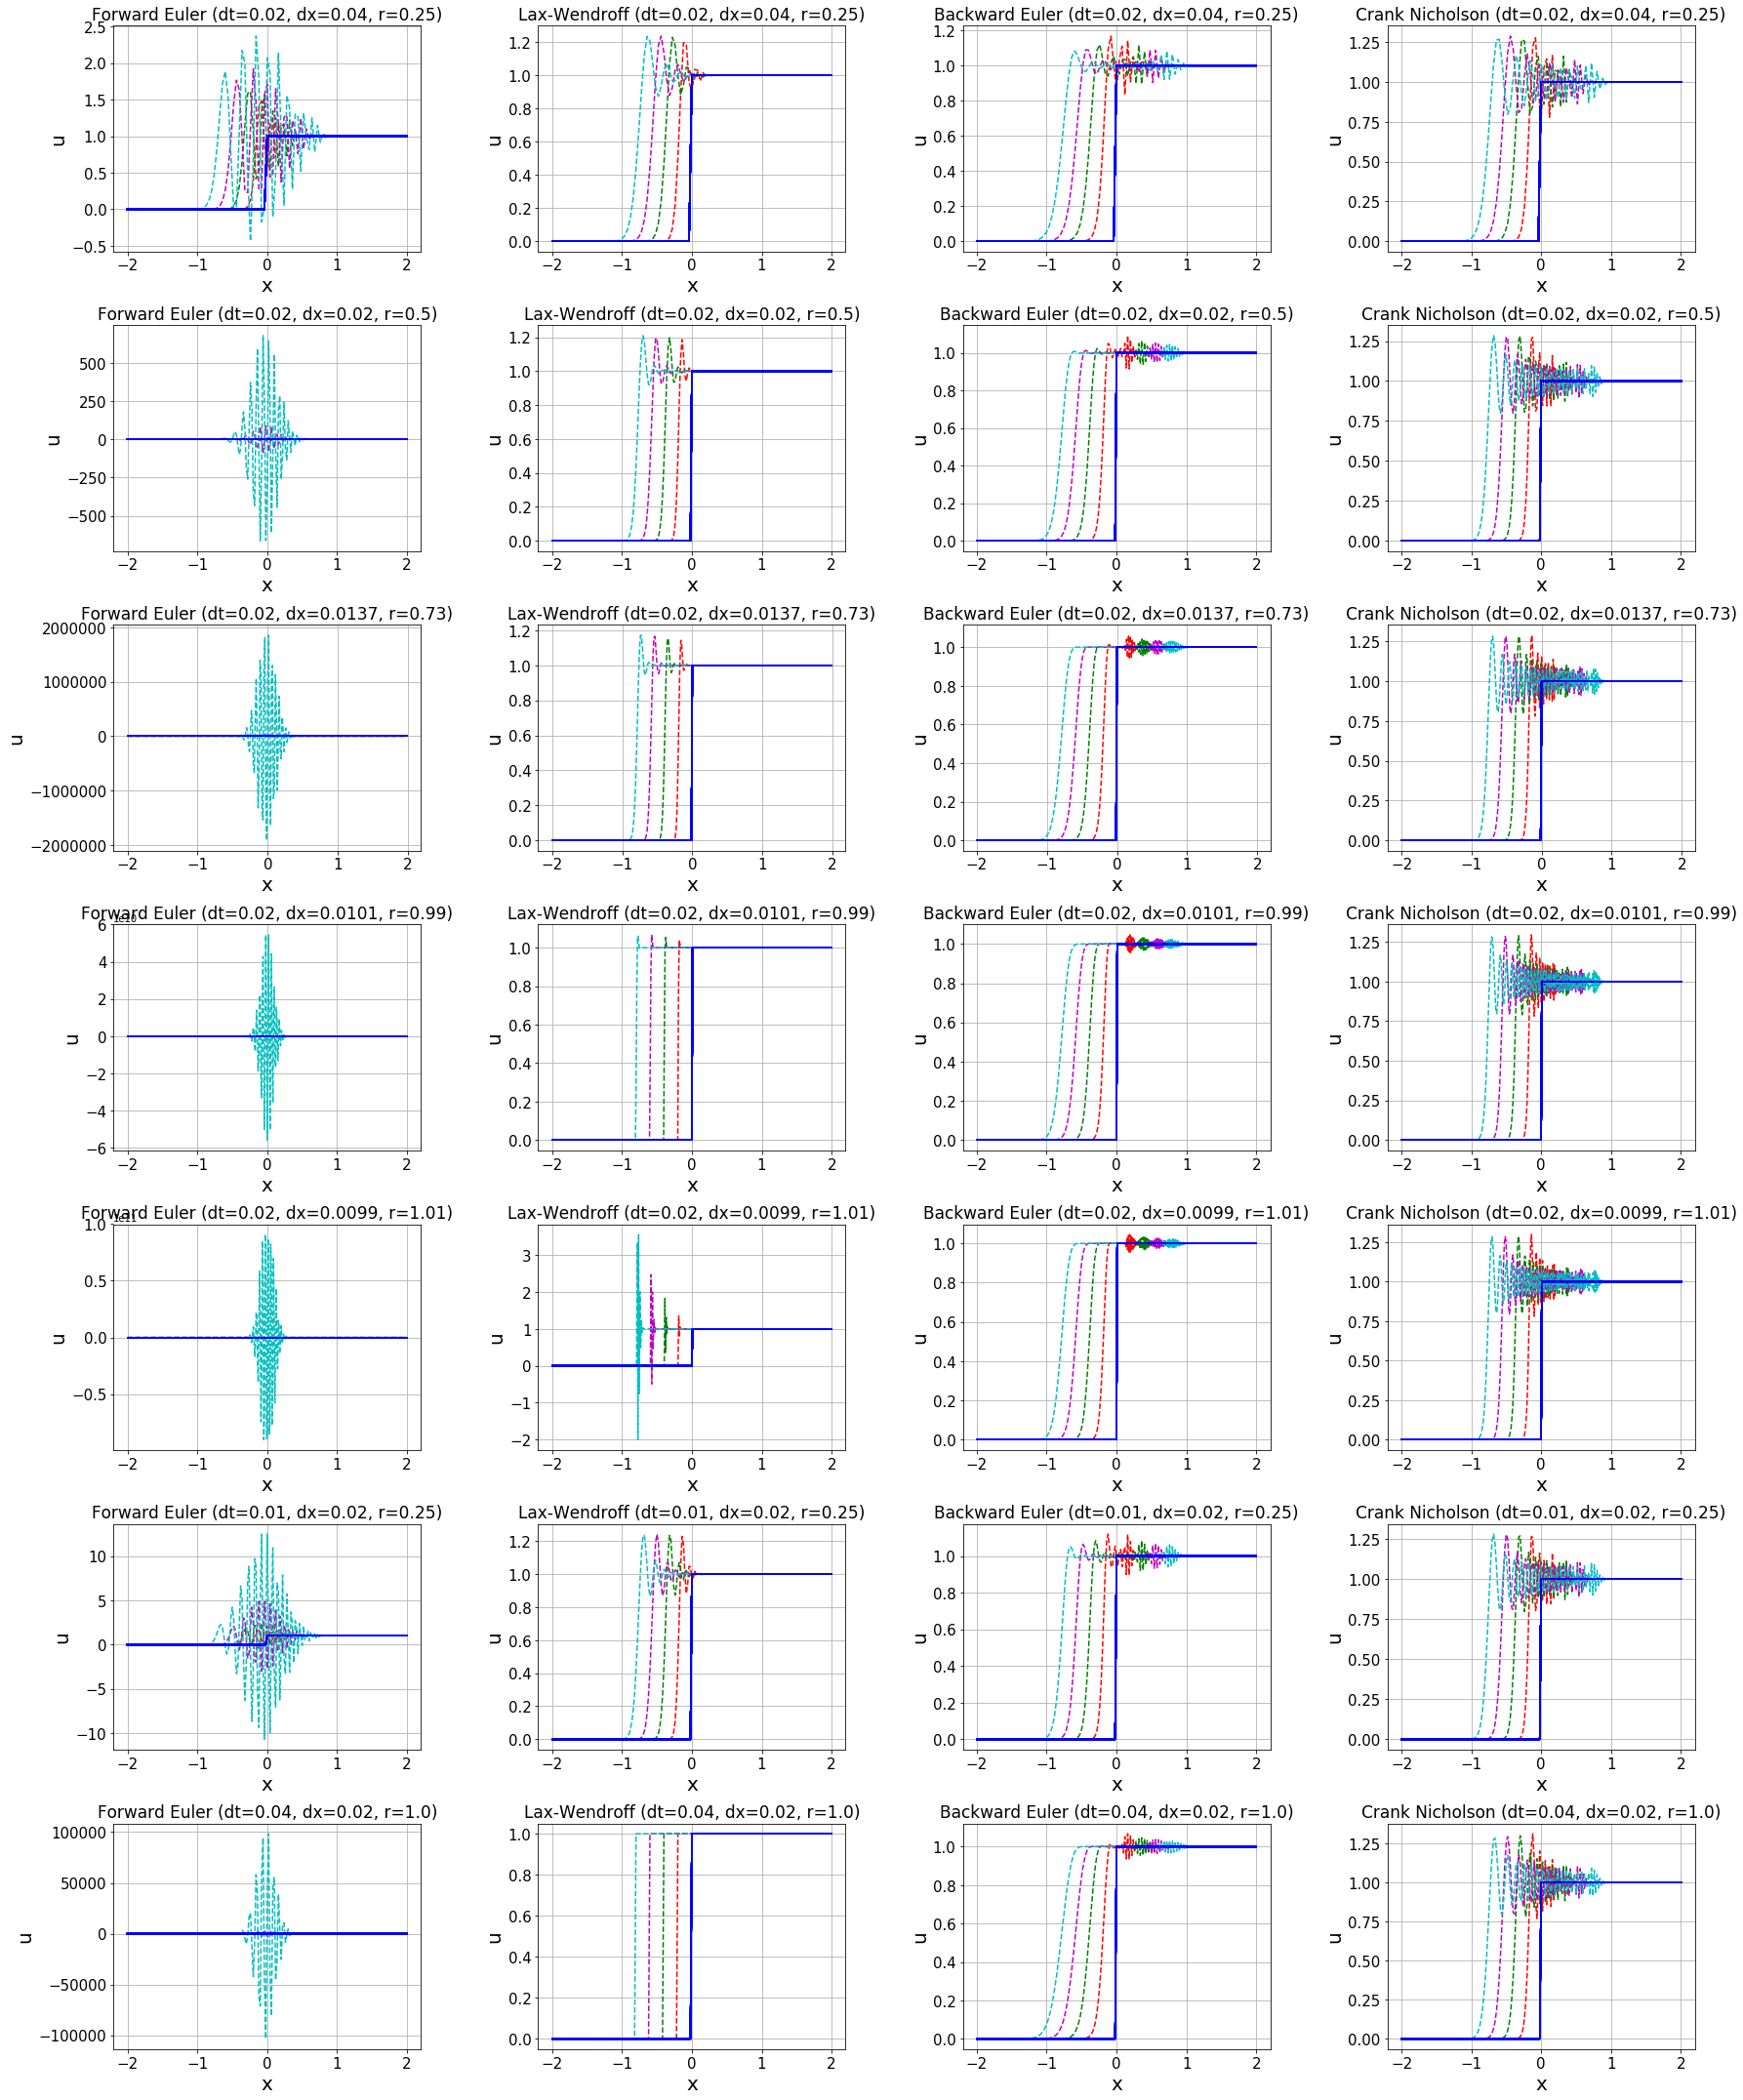

In [17]:
func = u0step
plot_trials(func)
    

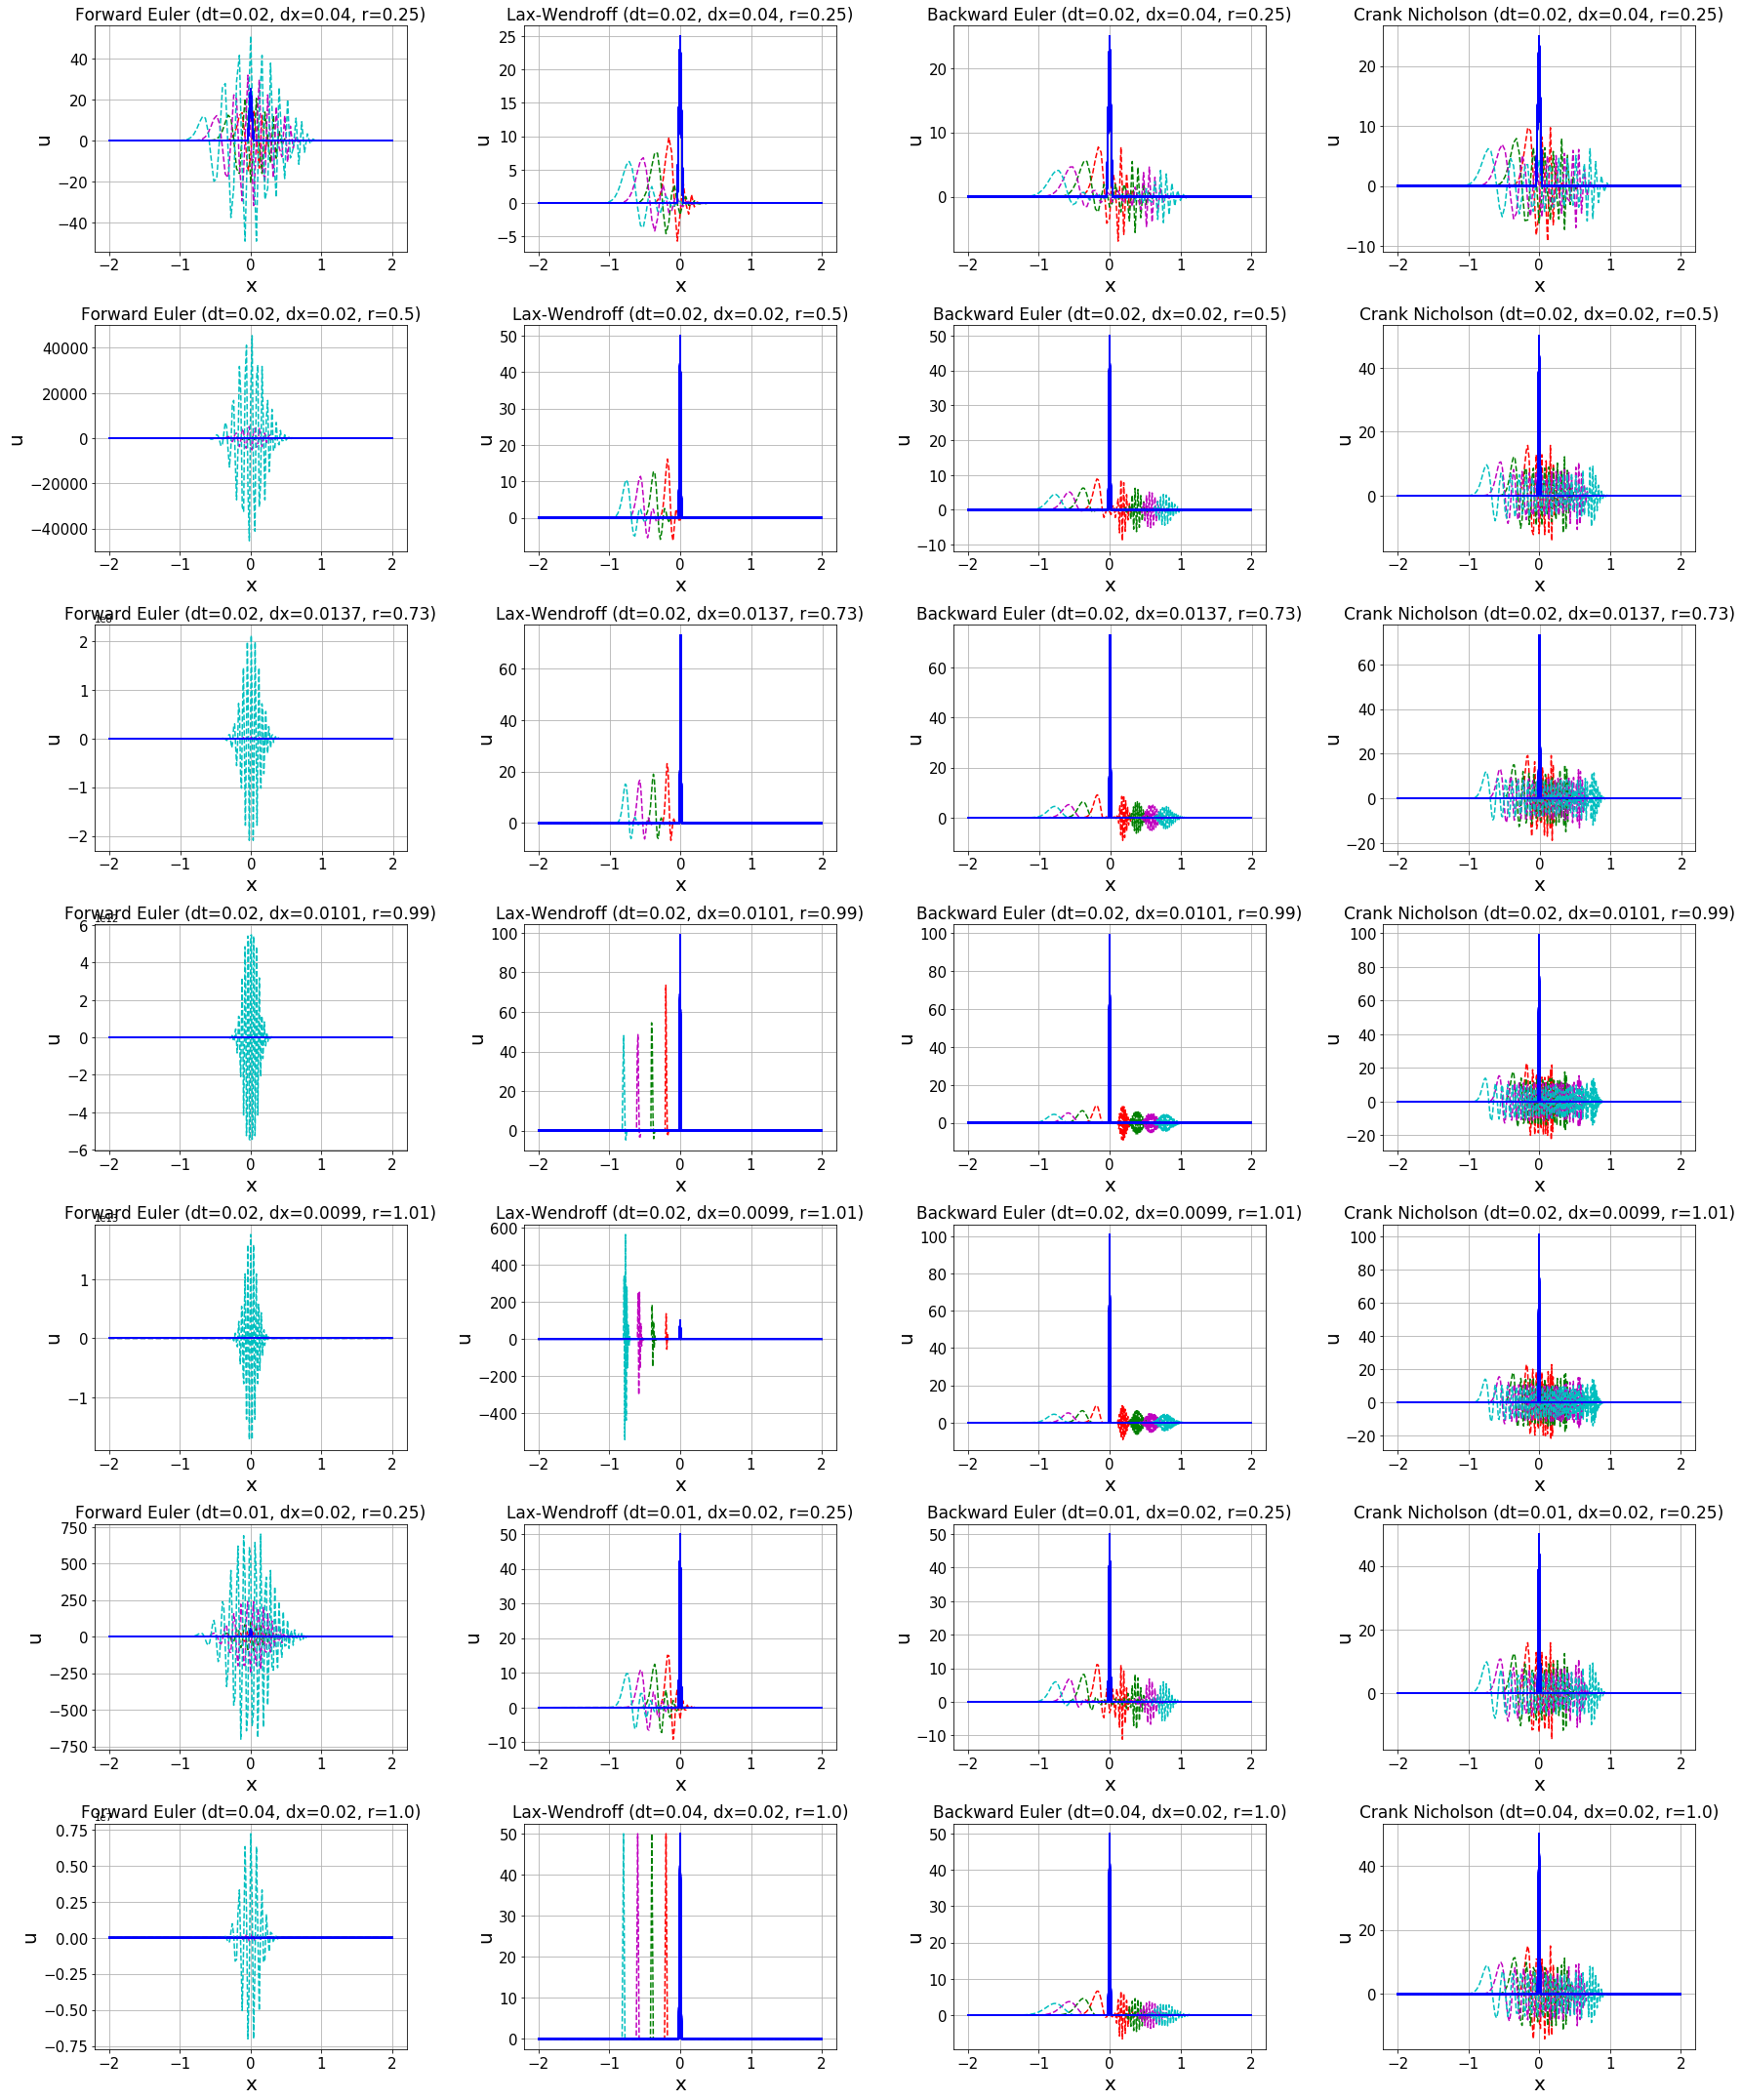

In [19]:
func = u0delta
plot_trials(func)

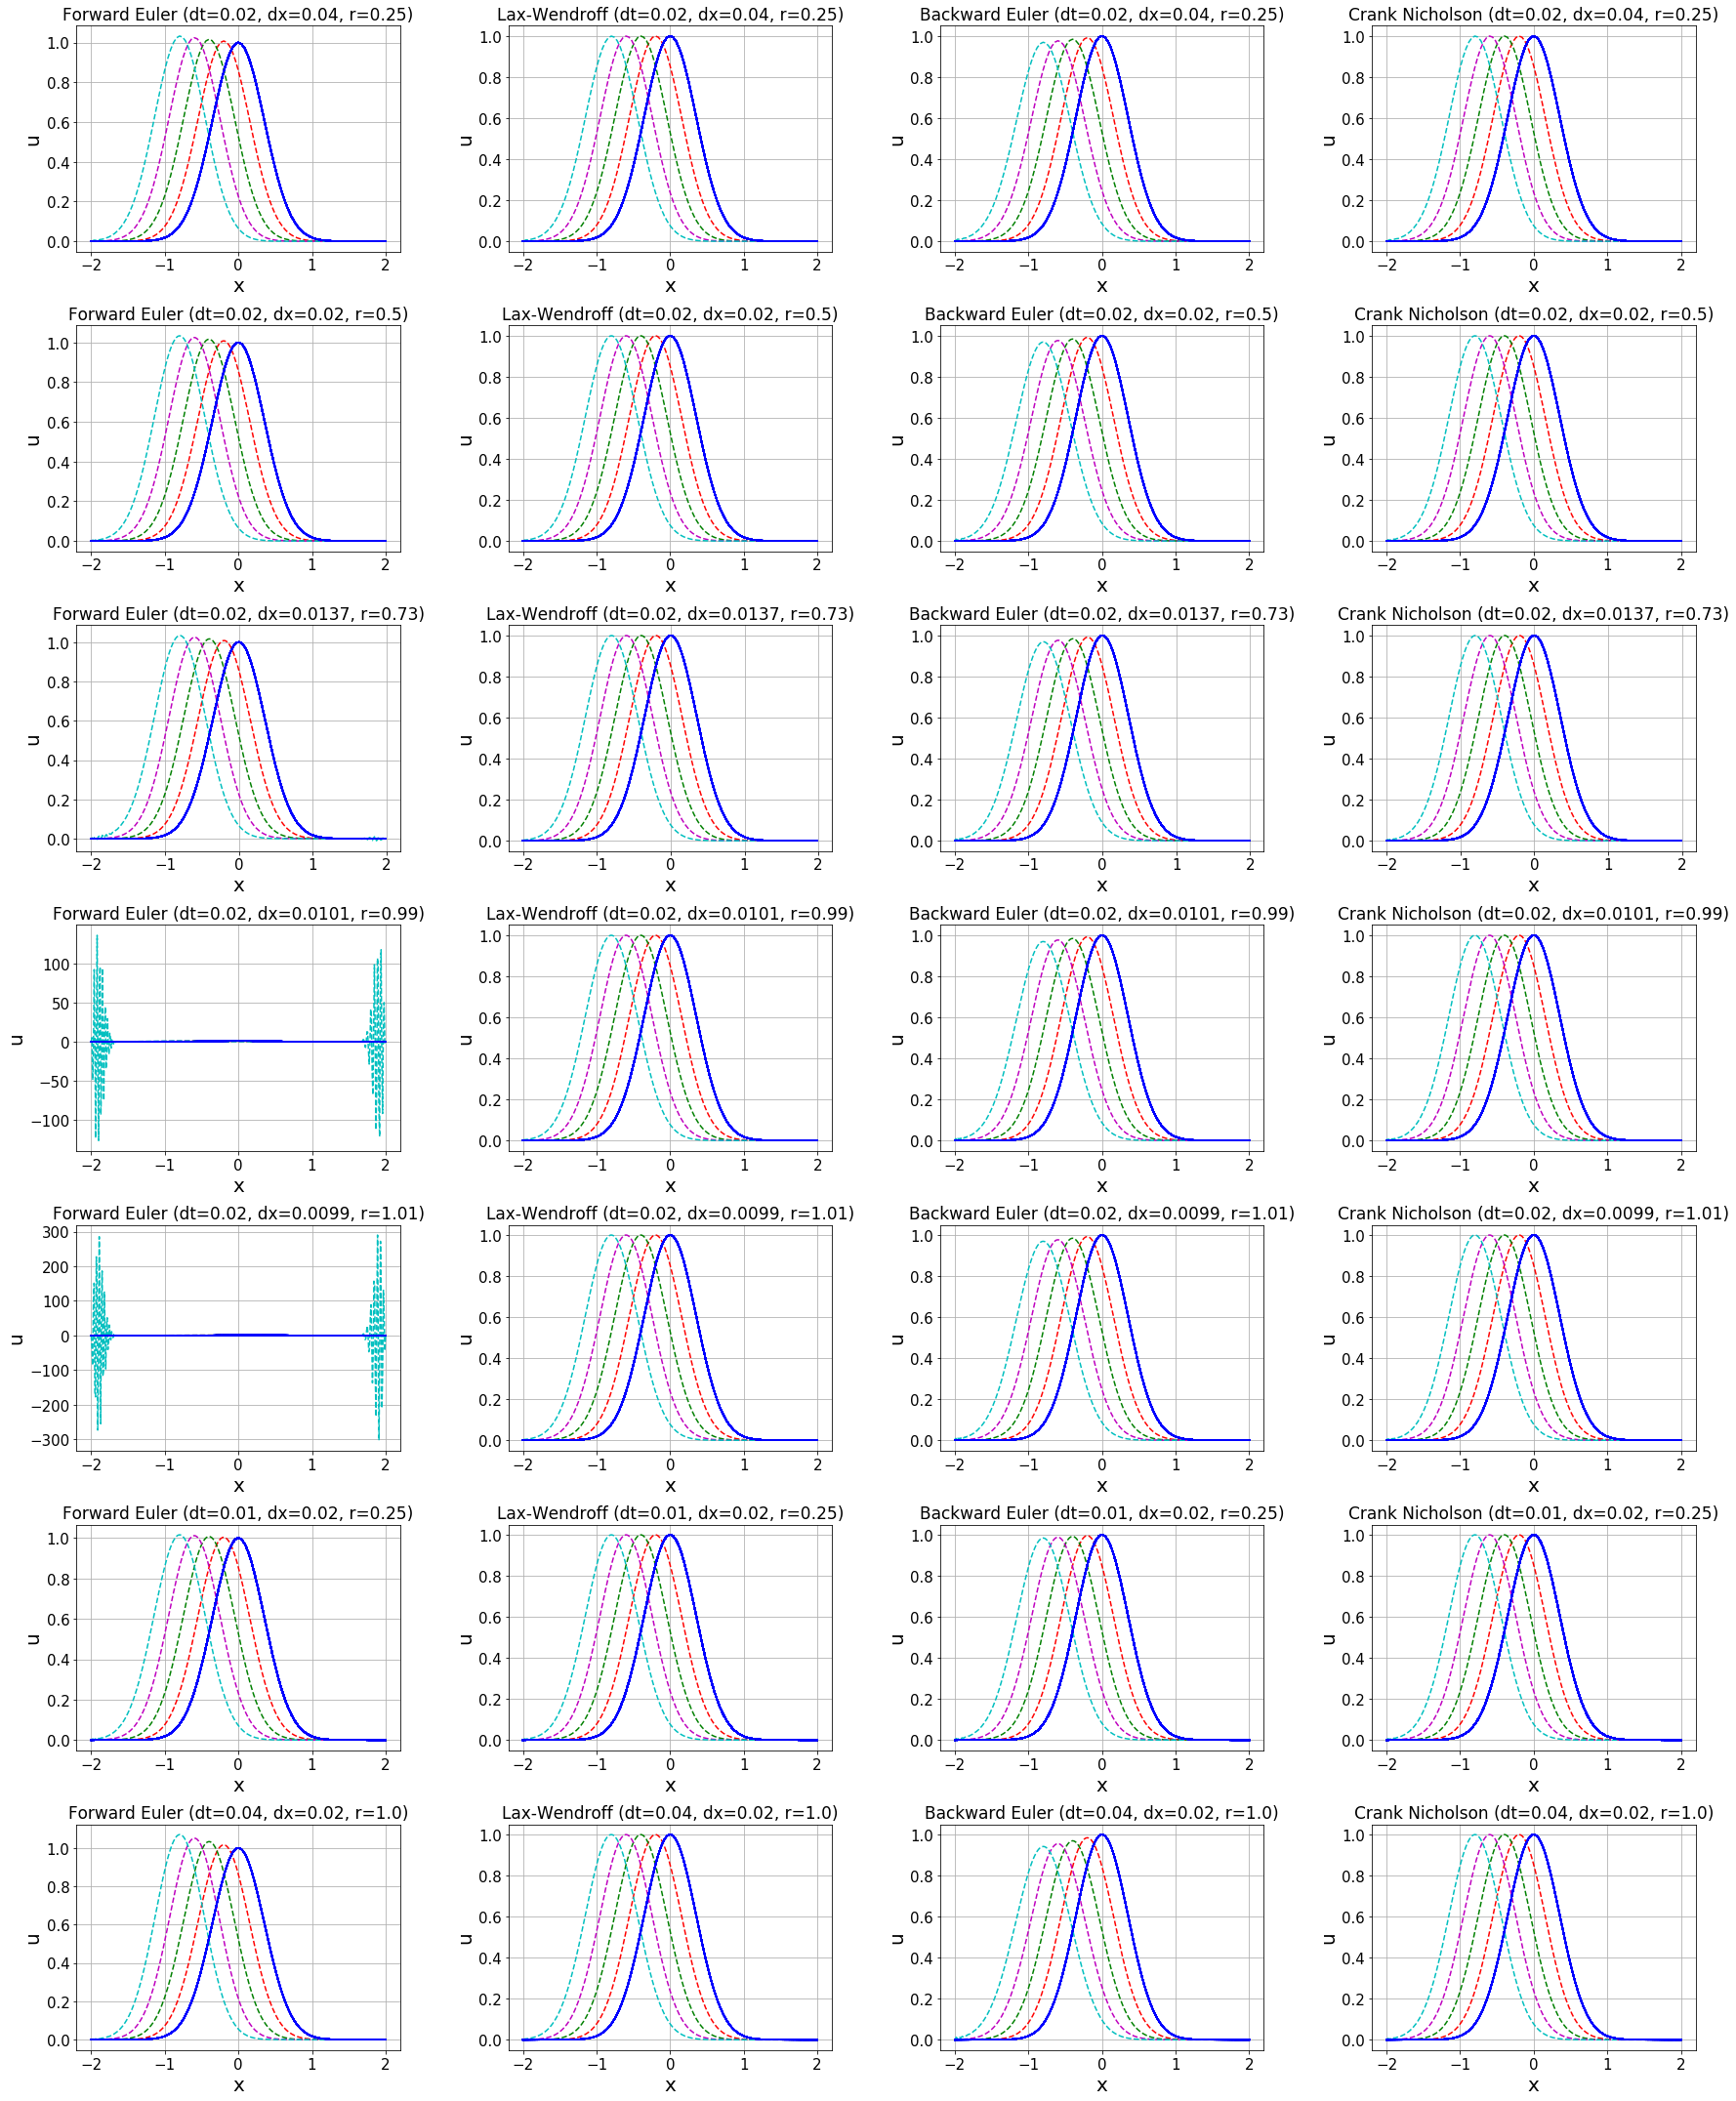

In [20]:
func = u0gauss
plot_trials(func)

In [931]:
do_animate = False
    
if not do_animate:
    % matplotlib inline
    
if do_animate:
    %matplotlib notebook
    fig, ax = plt.subplots(figsize=(10,5))

    x = np.arange(wavegrid.shape[1])
    line, = ax.plot(x, wavegrid[0])
    numt = wavegrid.shape[0]
    plt.grid('on')

    def animate(i):
        line.set_ydata(wavegrid[i])  # update the data
        return line,

    def init():
        line.set_ydata(np.ma.array(x, mask=True))
        return line,

    saving = True


    ani = animation.FuncAnimation(fig, animate, np.arange(1, numt), init_func=init,
                              interval=2, blit=True)

    if saving:
        plt.rcParams['animation.ffmpeg_path'] = '/Users/becky/anaconda/bin/ffmpeg'
        FFwriter = animation.FFMpegWriter(fps=60)
        print("Saving")
        ani.save('simple1.mp4', writer=FFwriter, dpi=100)
        print("Saved")
    
    plt.show()

## Advection-Diffusion Equation

In [21]:
def advec_diff_uij(i, j, r, s, u):
    
    return u[j-1][i] - r*(u[j-1][i] - u[j-1][i-1]) + s*(u[j-1][i+1] -2*u[j-1][i] + u[j-1][i-1])
 

In [22]:
def advec_diff(ugrid, r, s):

    nt, nx = ugrid.shape
    
    for j in range(1, nt):
        for i in range(1, nx-1):
            ugrid[j][i] = advec_diff_uij(i, j, r, s, ugrid)
            
        ugrid[j][0] = 0
        ugrid[j][nx-1] = 0
        
    return
        

In [23]:
def calculate_advec_diff_parameters(c, beta, nx, xmin, xmax):
    
    x = np.linspace(xmin, xmax, nx)
    dx = x[1]-x[0]
    
    dtmax = (dx**2)/(c*dx +2*beta)
    
    dt = 0.9*dtmax
    tsteps = int(57/dt)+1
    t = np.array([n*dt for n in range(tsteps)])
    
    r = c*dt/dx
    s = beta*dt/(dx**2)
    
    return x, dx, t, dt, tsteps, r, s

In [24]:
u0 = lambda x: np.sin(np.pi*x)

x, dx, t, dt, tsteps, r, s = calculate_advec_diff_parameters(0.5, 0.1, 101, 0, 1)
print(tsteps)

ugrid = np.zeros((tsteps, 101))
ugrid[0] = u0(x)

advec_diff(ugrid, r, s)

129834


1.0421466903e-40


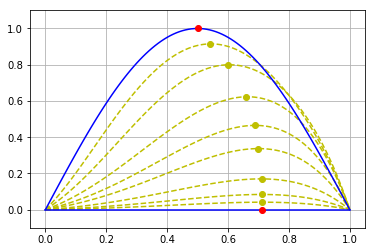

In [25]:
#plt.plot(np.ones(10)*x[np.where(ugrid[0]==ugrid[0].max())],np.linspace(-0.1,1.1,10), 'r--')
plt.ylim(-0.1,1.1)
plt.grid('on')

i=200
plt.plot(x, ugrid[i], 'y--')
plt.plot(x[np.where(ugrid[i]==ugrid[i].max())],ugrid[i].max(), 'yo')

i=500
plt.plot(x, ugrid[i], 'y--')
plt.plot(x[np.where(ugrid[i]==ugrid[i].max())],ugrid[i].max(), 'yo')

i=1000
plt.plot(x, ugrid[i], 'y--')
plt.plot(x[np.where(ugrid[i]==ugrid[i].max())],ugrid[i].max(), 'yo')

i=1500
plt.plot(x, ugrid[i], 'y--')
plt.plot(x[np.where(ugrid[i]==ugrid[i].max())],ugrid[i].max(), 'yo')

i=2000
plt.plot(x, ugrid[i], 'y--')
plt.plot(x[np.where(ugrid[i]==ugrid[i].max())],ugrid[i].max(), 'yo')

i=3000
plt.plot(x, ugrid[i], 'y--')
plt.plot(x[np.where(ugrid[i]==ugrid[i].max())],ugrid[i].max(), 'yo')

i=4000
plt.plot(x, ugrid[i], 'y--')
plt.plot(x[np.where(ugrid[i]==ugrid[i].max())],ugrid[i].max(), 'yo')

i=5000
plt.plot(x, ugrid[i], 'y--')
plt.plot(x[np.where(ugrid[i]==ugrid[i].max())],ugrid[i].max(), 'yo')

#plt.plot(np.ones(10)*x[np.where(ugrid[-1]==ugrid[-1].max())],np.linspace(-0.1,1.1,10), 'g--')

plt.plot(x, ugrid[0], 'b-')
plt.plot(x, ugrid[-1], 'b-');

plt.plot(x[np.where(ugrid[0]==ugrid[0].max())],ugrid[0].max(), 'ro')
plt.plot(x[np.where(ugrid[-1]==ugrid[-1].max())],ugrid[-1].max(), 'ro');

print(ugrid[-1].max())

In [697]:
print(x[np.where(ugrid[0]==ugrid[0].max())])
print(x[np.where(ugrid[-1]==ugrid[-1].max())])
print(x[np.where(ugrid[-1]==ugrid[-1].max())]-x[np.where(ugrid[0]==ugrid[0].max())])

[ 0.5]
[ 0.71]
[ 0.21]


# The diffusion equation

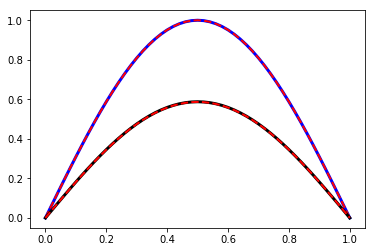

In [837]:
# (c, beta, nx, xmin, xmax)

u0 = lambda x: np.sin(np.pi*x)
u_analytical = lambda x, beta, t: np.exp(-beta*np.pi*np.pi*t)*u0(x) 

x, dx, t, dt, tsteps, r, s = calculate_advec_diff_parameters(0, 1, 51, 0, 1)
tsteps = 300

ugrid = np.zeros((tsteps, 51))
ugrid[0] = u0(x)

advec_diff(ugrid, r, s)

plt.plot(x, ugrid[0], 'b-', linewidth=3)
plt.plot(x, u_analytical(x, 1, 0*dt), 'r--', linewidth=2)
plt.plot(x, ugrid[299], 'k-', linewidth=3)
plt.plot(x, u_analytical(x, 1, 300*dt), 'r--', linewidth=2)

In [812]:
u2 = lambda x: x**2

uderFFD = lambda x: (u2(x+h) - u2(x))/(h)

x=3
h=0.1
test1 = np.abs(uderFFD(x)-2*x)
print('For h=0.1, the forward differences approximation is', uderFFD(x))
print('Forward differences error =',test1,'\n')

h=0.05
test2 = np.abs(uderFFD(x)-2*x)
print('For h=0.05, the forward differences approximation is', uderFFD(x))
print('forward differences error =',test2,'\n')

h=0.00005
test3 = np.abs(uderFFD(x)-2*x)
print('For h=0.00005, the forward differences approximation is', uderFFD(x))
print('forward differences error =',test3,'\n')




For h=0.1, the forward differences approximation is 6.100000000000012
Forward differences error = 0.1 

For h=0.05, the forward differences approximation is 6.049999999999969
forward differences error = 0.05 

For h=0.00005, the forward differences approximation is 6.0000499999901535
forward differences error = 4.99999901535e-05 



In [806]:
u2 = lambda x: x**2

uderCFD = lambda x: (u2(x+h) - u2(x-h))/(2*h)

x=3
h=0.1
test1 = np.abs(uderCFD(x)-2*x)

h=0.05
test2 = np.abs(uderCFD(x)-2*x)

h=0.00005
test3 = np.abs(uderCFD(x)-2*x)

print('h=0.1, central differences error =',test1)
print('h=0.05, central differences error =',test2)
print('h=0.00005, central differences error =',test3)


h=0.1, central differences error = 5.3290705182e-15
h=0.05, central differences error = 2.13162820728e-14
h=0.00005, central differences error = 1.39834810398e-11
